# Web Scrapping Goodreads

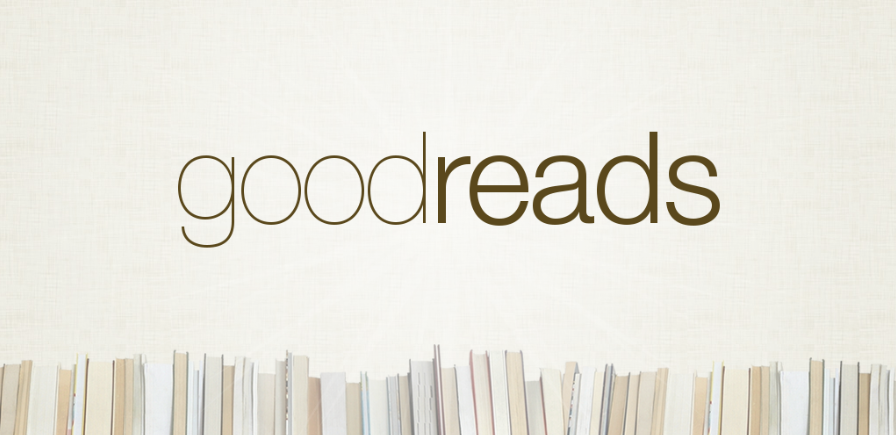

In [76]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [78]:
url = 'https://www.goodreads.com/list/show/6.Best_Books_of_the_20th_Century'
pages = 10
header = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36', 'Accepted-Language': 'en-US, en;q=0.5'})

In [80]:
webpage = requests.get(url, headers=header)

In [82]:
webpage

<Response [200]>

In [84]:
type(webpage.content)

bytes

In [86]:
name = []
author = []
avg_rating = []
total_ratings = []
score = []

In [88]:
for page_num in range(1, pages + 1):
    URL = url + '?page=' + str(page_num)
    response = requests.get(URL, headers= header)
    soup = BeautifulSoup(response.content, 'html.parser')
    books_data = soup.find('div', attrs={'id': 'all_votes'})
    book_cards = books_data.find_all('tr')
    for book in book_cards:
        name.append(book.find('span', itemprop='name').text)
        author.append(book.find('span', itemprop='author').text.strip())
        ratings = book.find('span', class_='minirating').text.split()
        i=0
        for x in ratings:
            if x[0].isdigit():
                if i==0:
                    avg_rating.append(float(x))
                    i+=1
                else:
                    total_ratings.append(int(x.replace(",", "")))
        score.append(float(book.find('span', class_='smallText uitext').text.split()[1].replace(",", "")))

In [90]:
df = pd.DataFrame({'Book Name': name, 'Author': author, 'Average Rating': avg_rating, 'Total Ratings': total_ratings, 'Score': score})

In [92]:
df.head()

,Book Name,Author,Average Rating,Total Ratings,Score
0,To Kill a Mockingbird,Harper Lee,4.26,6234510,1000536.0
1,1984,George Orwell,4.19,4705414,928369.0
2,Harry Potter and the Sorcerer’s Stone (Harry P...,J.K. Rowling,4.47,10238125,728154.0
3,The Great Gatsby,F. Scott Fitzgerald,3.93,5319920,728136.0
4,Animal Farm,George Orwell,3.99,3963355,515533.0


In [94]:
df

,Book Name,Author,Average Rating,Total Ratings,Score
0,To Kill a Mockingbird,Harper Lee,4.26,6234510,1000536.0
1,1984,George Orwell,4.19,4705414,928369.0
2,Harry Potter and the Sorcerer’s Stone (Harry P...,J.K. Rowling,4.47,10238125,728154.0
3,The Great Gatsby,F. Scott Fitzgerald,3.93,5319920,728136.0
4,Animal Farm,George Orwell,3.99,3963355,515533.0
...,...,...,...,...,...
995,Storm of Steel,Ernst Jünger,4.14,18040,922.0
996,"Asterix the Gaul (Asterix, #1)",René Goscinny,4.18,30665,921.0
997,Love You Forever,Robert Munsch,4.37,238939,921.0
998,The Baron in the Trees,Italo Calvino,4.02,46035,919.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book Name       1000 non-null   object 
 1   Author          1000 non-null   object 
 2   Average Rating  1000 non-null   float64
 3   Total Ratings   1000 non-null   int64  
 4   Score           1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [98]:
df.to_csv('Goodreads_best_books_20s.csv', index=False) 